In [1]:
#Testing cvfolds:

In [2]:
import scipy.io as sio
from sklearn.model_selection import StratifiedKFold

matdict = sio.loadmat('/Users/fruity/Dropbox/AllenInstitute/CellTypes/dat/raw/patchseq-v4/PS_v5_beta_0-4_pc_ipxf_eqTE.mat',squeeze_me=True)

In [3]:
skf = StratifiedKFold(n_splits=50, random_state=0, shuffle=True)
ind_dict = [{'train':train_ind, 'val':val_ind} for train_ind, val_ind in skf.split(X=np.zeros(shape=matdict['cluster'].shape), y=matdict['cluster'])]

/Users/fruity/miniconda3/envs/tf21-cpu/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=50.
  % (min_groups, self.n_splits)), UserWarning)


In [4]:
from analysis_tree_helpers import HTree
htree = HTree(htree_file='/Users/fruity/Dropbox/AllenInstitute/CellTypes/dat/raw/patchseq-v4/dend_RData_Tree_20181220.csv')
subtree = htree.get_subtree(node='n59')
#subtree.plot((15,3),fontsize=12)
df = subtree.obj2df()
df = df[df['isleaf']]
df = df.sort_values(by='x', axis=0).reset_index(drop=True)
ctype_ordered_list = df.child.tolist()

In [5]:
datset_counts = np.zeros((len(ctype_ordered_list),len(ind_dict)),dtype=int)
for i in range(len(ind_dict)):
    dat_set = matdict['cluster'][ind_dict[i]['val']]
    X = [np.sum(dat_set==ctype) for ctype in ctype_ordered_list]
    datset_counts[:,i] = np.array(X)

In [6]:
sum_of_splits = datset_counts.sum(axis=1)
ground_truth = np.array([np.sum(matdict['cluster']==ctype) for ctype in ctype_ordered_list])

In [7]:
for p in zip(ground_truth,ctype_ordered_list):
    print(p)

(1, 'Lamp5 Krt73')
(5, 'Lamp5 Fam19a1 Pax6')
(14, 'Lamp5 Fam19a1 Tmem182')
(62, 'Lamp5 Ntn1 Npy2r')
(130, 'Lamp5 Plch2 Dock5')
(158, 'Lamp5 Lsp1')
(15, 'Lamp5 Lhx6')
(4, 'Sncg Slc17a8')
(24, 'Sncg Vip Nptx2')
(18, 'Sncg Gpr50')
(83, 'Sncg Vip Itih5')
(1, 'Serpinf1 Clrn1')
(14, 'Serpinf1 Aqp5 Vip')
(5, 'Vip Igfbp6 Car10')
(0, 'Vip Igfbp6 Pltp')
(26, 'Vip Lmo1 Fam159b')
(76, 'Vip Lmo1 Myl1')
(22, 'Vip Igfbp4 Mab21l1')
(32, 'Vip Arhgap36 Hmcn1')
(17, 'Vip Gpc3 Slc18a3')
(114, 'Vip Ptprt Pkp2')
(28, 'Vip Rspo4 Rxfp1 Chat')
(23, 'Vip Lect1 Oxtr')
(9, 'Vip Rspo1 Itga4')
(59, 'Vip Chat Htr1f')
(80, 'Vip Pygm C1ql1')
(39, 'Vip Crispld2 Htr2c')
(93, 'Vip Crispld2 Kcne4')
(32, 'Vip Col15a1 Pde1a')
(110, 'Sst Chodl')
(39, 'Sst Mme Fam114a1')
(63, 'Sst Tac1 Htr1d')
(14, 'Sst Tac1 Tacr3')
(42, 'Sst Calb2 Necab1')
(237, 'Sst Calb2 Pdlim5')
(27, 'Sst Nr2f2 Necab1')
(43, 'Sst Myh8 Etv1 ')
(16, 'Sst Chrna2 Glra3')
(13, 'Sst Myh8 Fibin')
(11, 'Sst Chrna2 Ptgdr')
(12, 'Sst Tac2 Myh4')
(49, 'Sst Hpse Sema

In [8]:
assert np.array_equal(sum_of_splits,ground_truth)

In [9]:
%matplotlib inline

**Each cv set should have roughly the same distribution of types**

 - cvsets may not contain examples from each cell type
 - rough distribution of types is conserved across cvsets
 - for testing we can conbine a few different cv sets

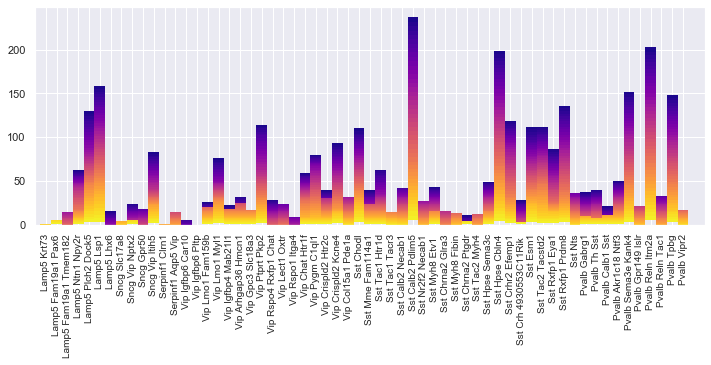

In [10]:
import seaborn as sns
sns.set()

cum_dataset_counts = np.cumsum(datset_counts,axis=1)
plt.figure(figsize=(12,4))
cmap=plt.get_cmap('plasma')
for i in range(len(ind_dict)):
    if i >0:
        plt.bar(x = np.arange(np.shape(datset_counts)[0]),
                height = datset_counts[:,i], 
                width=1, 
                bottom=cum_dataset_counts[:,i-1], 
                color=cmap(1 - i/len(ind_dict)),
                edgecolor='None',
                alpha=1)
ax = plt.gca()
ax.set_xticks(np.arange(np.shape(datset_counts)[0]))
ax.set_xticklabels(ctype_ordered_list,rotation=90,fontsize=10)
ax.set_xlim(-1,61)
plt.show()

In [11]:
low_conf = np.isin(matdict['map_conf'],['I2','I3'])
X = [np.sum(matdict['cluster'][low_conf]==ctype) for ctype in ctype_ordered_list]
Y = [np.sum(matdict['cluster'][~low_conf]==ctype) for ctype in ctype_ordered_list]

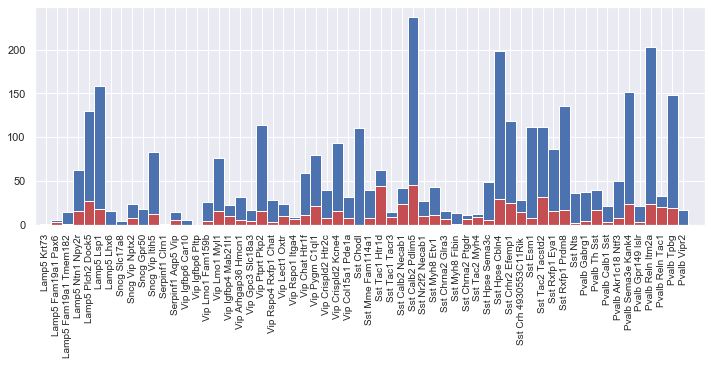

In [12]:
plt.figure(figsize=(12,4))
plt.bar(x = np.arange(np.shape(datset_counts)[0]),
        height = X, 
        width=1, 
        color='r')
plt.bar(x = np.arange(np.shape(datset_counts)[0]),
        height = Y, 
        bottom=X,
        width=1, 
        color='b')
ax = plt.gca()
ax.set_xticks(np.arange(np.shape(datset_counts)[0]))
ax.set_xticklabels(ctype_ordered_list,rotation=90,fontsize=10)
ax.set_xlim(-1,61)
plt.show()

In [1]:
from data_funcs import TE_get_splits_50

In [3]:
import scipy.io as sio
D = sio.loadmat('/Users/fruity/Dropbox/AllenInstitute/CellTypes/dat/raw/patchseq-v4/PS_v5_beta_0-4_pc_ipxf_eqTE.mat',squeeze_me=True)

In [4]:
cvset,testset = TE_get_splits_50(matdict=D)

/Users/fruity/miniconda3/envs/tf21-cpu/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=50.
  % (min_groups, self.n_splits)), UserWarning)
